# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [4]:
 import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [5]:
df = pd.read_csv('craftcans.csv')
df.head(20)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


## How many rows do you have in the data? What are the column types?

In [6]:
len(df)

2416

In [25]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [8]:
top_producers = ( #create a new dataframe
    df.groupby('Brewery')['Beer'] #group all the data by the brewery column
      .nunique() #For each brewery, count the number of unique beer names
      .sort_values(ascending=False) #sort them in ascending order
      .head(10) #show me the first 10 
)
print(top_producers)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Upslope Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64


## What is the most common ABV? (alcohol by volume)

In [9]:
df['ABV'].value_counts().nlargest()

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [10]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [11]:
print(df['ABV'].dtype) #For some reason my code where I changed it from string to numeric got deleted, and now I can't get it back. Oh well :) 

object


In [12]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [13]:
df['ABV'].mean()

TypeError: can only concatenate str (not "int") to str

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt 

plt.hist(df['ABV'].dropna(), bins=10) # Plot a histogram of the ABV column using 30 bars, removing any missing values.
plt.xlabel('ABV (%)') # Set the label for the x-axis to 'ABV (%)'
plt.ylabel('Number of Beers') # Set the label for the y-axis to "Number of Beers" 
plt.title('Distribution of ABV') # Set the title 
plt.show()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [ ]:
print(df['ABV'].isnull().value_counts()) # Count how many beers have missing ABV values (True) and how many have ABV listed (False)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [ ]:
df['Location'].value_counts().head(10) # Count how many beers are from each place and show the top 10 

## List all of the beer from Brooklyn, NY

In [ ]:
df[df['Location'] == 'Brooklyn, NY']

## What brewery in Brooklyn puts out the most different cans of beer

In [ ]:
print(df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts().head(1))

## What are the five most common styles of beer produced by Sixpoint?

In [ ]:
print(df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5))

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [ ]:
df[df['Location'].str.contains('NY', na=False)]['Brewery'].unique()

### Now *count* all of the breweries in New York state

In [ ]:
df[df['Location'].str.contains('NY', na=False)]['Brewery'].nunique()

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [ ]:
df[df['Style'].str.contains('IPA', case=False, na=False)]

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
df['IBUs'].mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [ ]:
df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')
df['IBUs'].mean()

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [ ]:
df['IBUs'].hist(bins=20)

plt.xlabel('IBU')
plt.ylabel('Number of beers')
plt.title('Distribution of IBU Measurements')
plt.show()

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [14]:
df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')

# Get percentiles
percentiles = df['IBUs'].quantile([0.25, 0.5, 0.75])
print(percentiles)

0.25    21.0
0.50    35.0
0.75    64.0
Name: IBUs, dtype: float64


In [16]:
df_above_75th = df[df['IBUs'] > 64]
print(df_above_75th[['Beer', 'IBUs']])

                         Beer   IBUs
6              Citra Ass Down   68.0
7              London Balling   80.0
14                Rico Sauvin   68.0
17               Pile of Face   65.0
21                 Excess IPL   80.0
...                       ...    ...
2408    Brew Free! or Die IPA   65.0
2410  Ten Fidy Imperial Stout   98.0
2412       GUBNA Imperial IPA  100.0
2414        Gordon Ale (2009)   85.0
2415          Dale's Pale Ale   65.0

[346 rows x 2 columns]


## List all of the beers with IBUs below the 25th percentile

In [18]:

df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')

# Find the 25th percentile value
percentile_25 = df['IBUs'].quantile(0.25)
print("25th percentile IBUs:", percentile_25)

# List all beers with IBUs below the 25th percentile
beers_below_25th = df[df['IBUs'] < percentile_25]
print(beers_below_25th[['Beer', 'IBUs']])

25th percentile IBUs: 21.0
                               Beer  IBUs
2                        Wall's End  19.0
12                         Sho'nuff  13.0
13                      Bloody Show  17.0
18                   The Brown Note  20.0
19                      House Lager  18.0
...                             ...   ...
2372               Bombshell Blonde  20.0
2385            Bikini Blonde Lager  18.0
2396               Royal Weisse Ale  11.0
2404                           Hell  20.0
2409  Hell or High Watermelon Wheat  17.0

[338 rows x 2 columns]


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert IBUs to numeric if needed
df['IBUs'] = pd.to_numeric(df['IBUs'], errors='coerce')

# Group by 'Style' and get the median
median_ibus = df.groupby('Style')['IBUs'].median().reset_index()

In [20]:
# Sort descending, missing at the bottom
median_ibus_sorted = median_ibus.sort_values(
    by='IBUs', 
    ascending=False, 
    na_position='last'
)

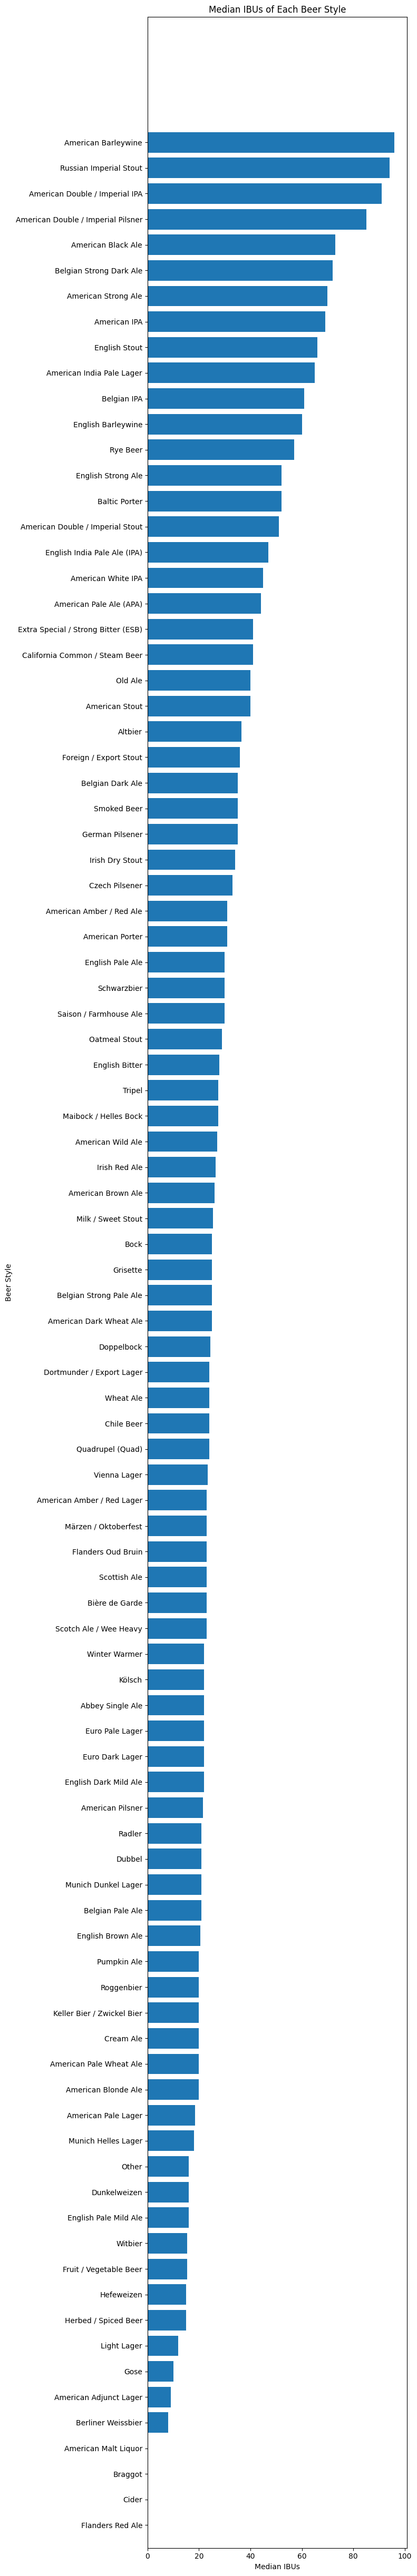

In [21]:
plt.figure(figsize=(8, len(median_ibus_sorted) // 2))
plt.barh(median_ibus_sorted['Style'], median_ibus_sorted['IBUs'])
plt.xlabel('Median IBUs')
plt.ylabel('Beer Style')
plt.title('Median IBUs of Each Beer Style')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## this is too hard

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [23]:
wheat_df = df[df['Style'].isin(wheat_styles)]

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!